# Predictive Modeling Analysis of US Suicide Deaths
Capstone Project for M.S. Data Analytics Program

Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/capstone-stonerogers), April 17, 2025

## Introduction 
This is a professional project exaiming trends in suicide over time. Data has been gathered from Center for Disease Control using
the Wide-ranging ONline Data for Epidemiologic Research[(WONDER)](https://wonder.cdc.gov) system. 

Commands were used on a Mac machine running zsh.

### Run Predictive Model

In [27]:
import pandas as pd 
import pickle

# Load cleaned dataset
df = pd.read_csv('data/cleaned_data.csv')

# Select only the columns used during model training
X = df[['age_group_years', 'sex', 'race_code', 'population']]

# Load your trained model (replace filename if needed)
with open('models/lr_model.pkl', 'rb') as f:
    linear_regression_model = pickle.load(f)

# Make predictions
predicted_deaths = linear_regression_model.predict(X)

# Add predictions back to the DataFrame (optional but useful)
df['predicted_deaths'] = predicted_deaths

# Save if you want
df.to_csv('data/predictions_with_cleaned_data.csv', index=False)

print("Predictions made and saved.")

print(df.head)

Predictions made and saved.
<bound method NDFrame.head of         state  state_code  age_group_years  sex   race  race_code  year  \
0     Alabama           1               20    1  White          4  2018   
1     Alabama           1               20    1  White          4  2020   
2     Alabama           1               25    1  White          4  2018   
3     Alabama           1               25    1  White          4  2020   
4     Alabama           1               30    1  White          4  2022   
...       ...         ...              ...  ...    ...        ...   ...   
7101  Wyoming          56               60    2  White          4  2018   
7102  Wyoming          56               60    2  White          4  2019   
7103  Wyoming          56               60    2  White          4  2022   
7104  Wyoming          56               65    2  White          4  2022   
7105  Wyoming          56               65    2  White          4  2023   

      deaths  population  predicted_death

## Visualizations 

### Bar Chart Comparisons

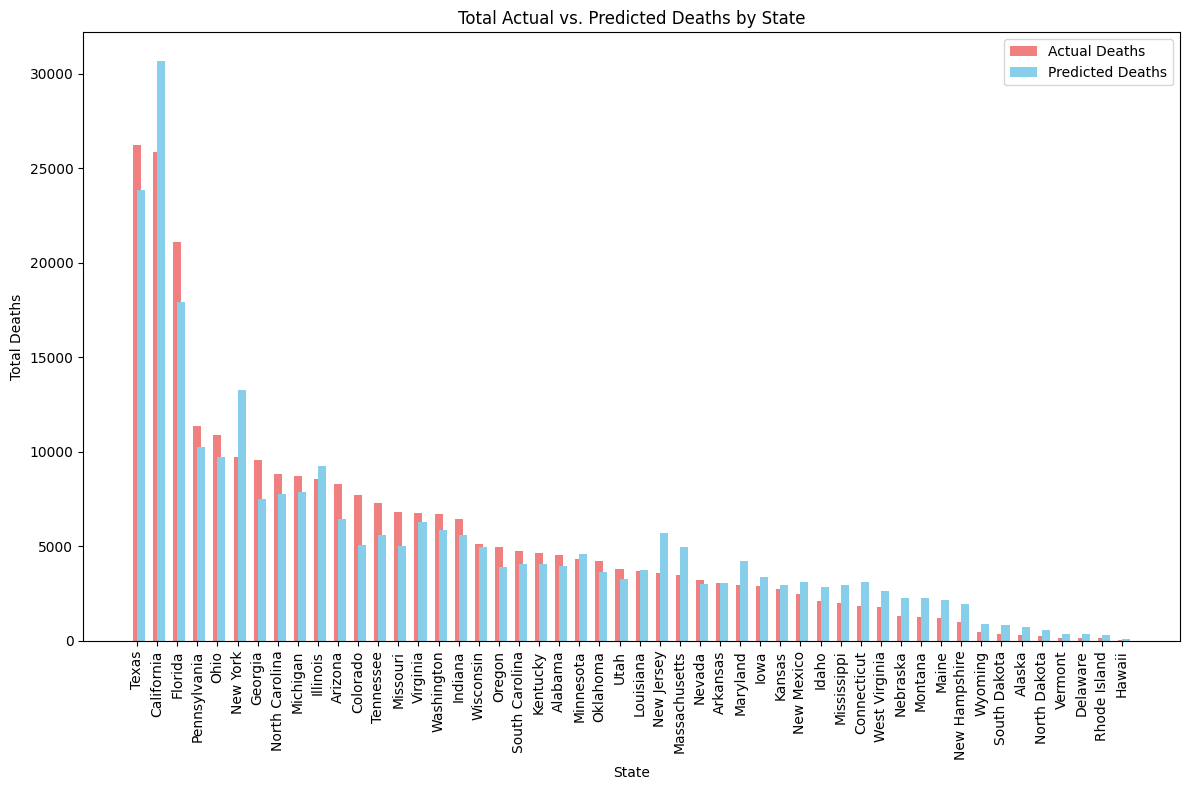

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions file (the one where you added predicted deaths)
df_predicted = pd.read_csv('data/predictions_with_cleaned_data.csv')

# Aggregate predicted deaths by state (sum the 'predicted_deaths' column per state)
state_predicted_deaths = df_predicted.groupby('state')['predicted_deaths'].sum()

# Sort the values from high to low (this will order by predicted deaths)
state_predicted_deaths = state_predicted_deaths.sort_values(ascending=False)

# Aggregate actual deaths by state (from the original dataset)
df_original = pd.read_csv('data/cleaned_data.csv')
state_actual_deaths = df_original.groupby('state')['deaths'].sum()

# Sort actual deaths from high to low
state_actual_deaths = state_actual_deaths.sort_values(ascending=False)

# Create a side-by-side bar plot for both actual and predicted deaths
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for actual and predicted deaths
ax.bar(state_actual_deaths.index, state_actual_deaths.values, width=0.4, label='Actual Deaths', align='center', color='lightcoral')
ax.bar(state_predicted_deaths.index, state_predicted_deaths.values, width=0.4, label='Predicted Deaths', align='edge', color='skyblue')

# Set plot title and labels
ax.set_title('Total Actual vs. Predicted Deaths by State')
ax.set_xlabel('State')
ax.set_ylabel('Total Deaths')
ax.legend()

# Rotate x-axis labels if there are many states
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Scatter Plot Comparison

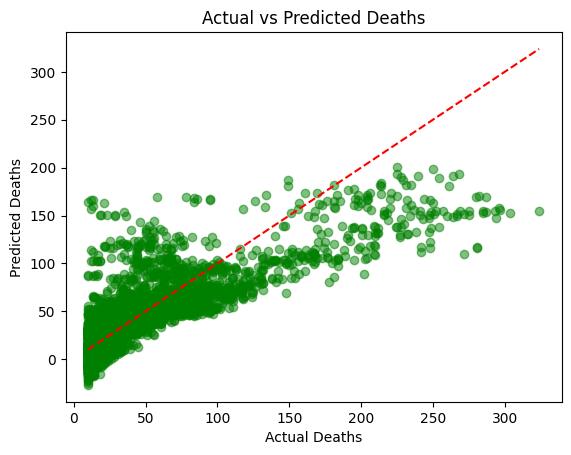

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['deaths'], df['predicted_deaths'], alpha=0.5, c= 'green')
plt.plot([df['deaths'].min(), df['deaths'].max()],
         [df['deaths'].min(), df['deaths'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs Predicted Deaths')
plt.show()


### Error Distribution

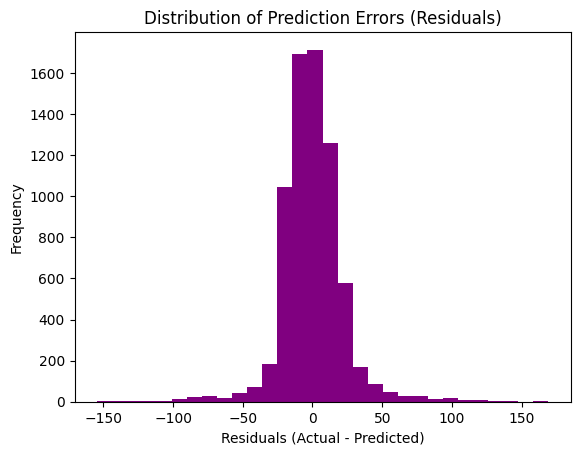

In [30]:
df['residuals'] = df['deaths'] - df['predicted_deaths']
plt.hist(df['residuals'], bins=30, color='purple')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


### Bar Chart Top 10 States

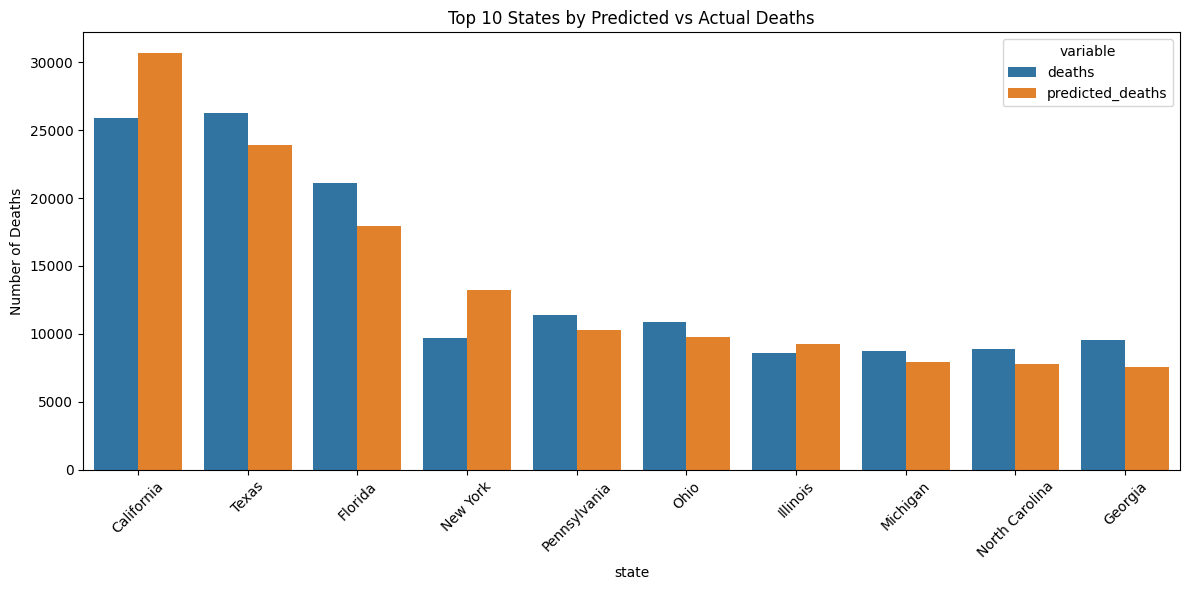

In [31]:
import seaborn as sns

top_states = df.groupby('state')[['deaths', 'predicted_deaths']].sum().sort_values('predicted_deaths', ascending=False).head(10)
top_states.reset_index(inplace=True)

top_states_melted = top_states.melt(id_vars='state', value_vars=['deaths', 'predicted_deaths'])

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='value', hue='variable', data=top_states_melted)
plt.title('Top 10 States by Predicted vs Actual Deaths')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Heatmap

In [32]:
import pandas as pd
import folium
import json
import requests

# Group by state and sum the deaths
state_deaths = df.groupby('state')['deaths'].sum().reset_index()

# Load U.S. States GeoJSON data
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

# Create a folium map
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add choropleth layer
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_deaths,
    columns=['state', 'deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Deaths by State'
).add_to(m)

# Add layer control and display map
folium.LayerControl().add_to(m)
m


## Discussion

Various charts and visualization tools were used including bar charts, a scatter plot, histogram, and heat map. 
The first bar chart compated the number of actual deaths versus the number of predicted deaths. This chart gives some insight into the accuracy of the model. The chart can also guide future considerations of suicide trends in states with significant discrepancies between actual 